In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import keras
from keras.layers import Dense

Using TensorFlow backend.


In [175]:
df = pd.read_csv("/Users/mananmehta/Downloads/Train_dataset.csv")

In [245]:
df.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,16,10,"12,442,373","11,978,450",878.0,23.0,32.0,2,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,Delhi,6,10,"11,007,835","9,879,172",858.0,27.0,30.0,2,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,Bangalore,13,16,"8,436,675","4,301,326",936.0,28.0,37.0,0,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,Hyderabad,28,16,"6,809,970","3,637,483",930.0,23.0,31.0,2,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,Ahmedabad,8,16,"5,570,585","3,520,085",852.0,29.0,25.0,1,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204


In [177]:
for i in range(len(df)):
 #   if type(df.iloc[i]['SWM']) == 'float':
        print(df.iloc[i]['SWM'])

MEDIUM
MEDIUM
HIGH
MEDIUM
LOW
HIGH
MEDIUM
nan
nan
nan
HIGH
HIGH
LOW
HIGH
MEDIUM
MEDIUM
LOW
LOW
HIGH
HIGH
LOW
LOW
MEDIUM
HIGH
LOW
HIGH
MEDIUM
LOW
HIGH
HIGH
LOW
HIGH
MEDIUM
LOW
HIGH
LOW
LOW
LOW
HIGH
LOW
LOW
LOW
HIGH
LOW
MEDIUM
LOW
LOW
MEDIUM
LOW
HIGH
MEDIUM
MEDIUM
MEDIUM
HIGH
MEDIUM
HIGH
HIGH
LOW
HIGH
MEDIUM
MEDIUM
HIGH
LOW
LOW
LOW
MEDIUM
MEDIUM
MEDIUM
LOW
HIGH
HIGH
LOW
LOW
HIGH
HIGH
MEDIUM
MEDIUM
LOW
MEDIUM
LOW
LOW
MEDIUM
LOW
LOW
HIGH
HIGH
LOW
HIGH
LOW
HIGH
MEDIUM
LOW
HIGH
MEDIUM
LOW
HIGH
HIGH
HIGH
MEDIUM
HIGH
LOW
HIGH
HIGH
MEDIUM
HIGH
LOW
LOW
MEDIUM
LOW
MEDIUM
LOW
HIGH
HIGH
LOW
LOW
MEDIUM
MEDIUM
HIGH
HIGH
LOW
LOW
LOW
LOW
HIGH
HIGH
MEDIUM
LOW
LOW
MEDIUM
HIGH
LOW
HIGH
HIGH
MEDIUM
LOW
HIGH
HIGH
LOW
LOW
LOW
LOW
LOW
LOW
MEDIUM
MEDIUM
HIGH
LOW
HIGH
MEDIUM
LOW
HIGH
HIGH
MEDIUM
LOW
HIGH
HIGH
LOW
LOW
LOW
LOW
LOW
LOW
LOW
MEDIUM
HIGH
LOW
MEDIUM
LOW
MEDIUM
MEDIUM
MEDIUM
HIGH
LOW
MEDIUM
LOW
HIGH
HIGH
MEDIUM
HIGH
HIGH
LOW
MEDIUM
LOW
MEDIUM
HIGH
LOW
MEDIUM
HIGH
HIGH
MEDIUM
MEDIUM
HIGH
MEDIUM
MEDIUM
L

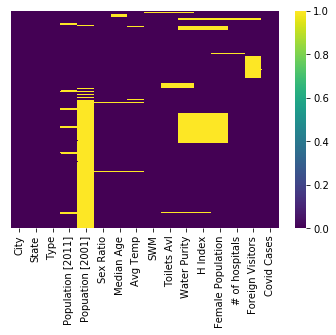

In [178]:
sns.heatmap(df.isnull(),cmap = 'viridis',annot = False,yticklabels=False)

### Handling categorical data 
### Changing colums "state" , "SWM" , "type" with categorical labels

In [179]:
print(df['State'].value_counts())
print(df['State'].nunique())

Andhra Pradesh                 78
Maharashtra                    73
Uttar Pradesh                  67
Tamil Nadu                     63
Bihar                          51
Karnataka                      44
Madhya Pradesh                 43
West Bengal                    42
Gujarat                        41
Kerala                         39
Telangana                      35
Punjab                         33
Rajasthan                      32
Odisha                         27
Haryana                        21
Jharkhand                      21
Assam                          21
Chhattisgarh                   11
Uttarakhand                    10
Delhi                           7
Jammu and Kashmir               6
Puducherry                      5
Goa                             3
Nagaland                        2
Manipur                         2
Mizoram                         2
Tamil nadu                      2
Chandigarh                      1
Meghalaya                       1
Sikkim        

In [180]:
print(df['Type'].value_counts())
print(df['Type'].nunique())

C-1T              269
M                 236
M.Cl               59
MPUA               44
M.B                28
UA                 28
N.P.P              13
T.M.C              13
N.P                10
C.T                 9
M.Cl.               8
M.C                 7
C.M.C               7
N.A.C               6
T.P                 5
N.P.P.              5
C.B                 3
NP                  3
T.M.C.              3
CMC                 3
N.Pd                3
M.Corp              2
N.P.                2
NPP                 2
N.A                 2
MB                  2
T                   2
T.C                 2
C.T.                2
M.B.                2
Np                  1
T.P.                1
U.A                 1
N.T                 1
M.Corp.             1
M Cl                1
Nagar Parishad      1
Name: Type, dtype: int64
37


In [181]:
print(df['SWM'].value_counts())
print(df['SWM'].nunique())

HIGH      272
LOW       260
MEDIUM    251
Name: SWM, dtype: int64
3


In [182]:
df.dropna(subset = ['SWM'],inplace=True)

In [183]:
state_lb = LabelEncoder()

state_lb.fit(df['State'])
df['State'] = state_lb.transform(df['State'])

type_lb = LabelEncoder()
type_lb.fit(df['Type'])
df['Type'] = type_lb.transform(df['Type'])

swm_lb = LabelEncoder()
swm_lb.fit(df['SWM'])
df['SWM'] = swm_lb.transform(df['SWM'])

## Coverting Population 2011 to Float64

In [72]:
def change_type(x):
    if isinstance(x,float):
         return None
    
    return int("".join(x.split(',')),10)

In [73]:
df['Population [2011]'] = df['Population [2011]'].apply(change_type)

In [74]:
df.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,16,10,12442373.0,"11,978,450",878.0,23.0,32.0,2,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,Delhi,6,10,11007835.0,"9,879,172",858.0,27.0,30.0,2,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,Bangalore,13,16,8436675.0,"4,301,326",936.0,28.0,37.0,0,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,Hyderabad,28,16,6809970.0,"3,637,483",930.0,23.0,31.0,2,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,Ahmedabad,8,16,5570585.0,"3,520,085",852.0,29.0,25.0,1,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 0 to 786
Data columns (total 16 columns):
City                 783 non-null object
State                783 non-null int64
Type                 783 non-null int64
Population [2011]    735 non-null float64
Popuation [2001]     292 non-null object
Sex Ratio            775 non-null float64
Median Age           766 non-null float64
Avg Temp             767 non-null float64
SWM                  783 non-null int64
Toilets Avl          761 non-null float64
Water Purity         628 non-null float64
H Index              643 non-null float64
Female Population    642 non-null float64
# of hospitals       768 non-null float64
Foreign Visitors     693 non-null float64
Covid Cases          783 non-null int64
dtypes: float64(10), int64(4), object(2)
memory usage: 104.0+ KB


## Data Cleaning
- Fill Population 2011 Nan Values with 2.954748e+05	
- Remove Poulation 2001 as it has many Nan Values
- Fill Sex Ratio Nan values with 906
- Fill Median Age Nan values with 26
- Fill Avg Temp Nan with 31
- Remove 3 SWM Nan
- Fill Toilets Avl Nan values with mean 96
- Fill Water purity Nan with 150
- Fill H index Nan with 0.5
- Fill Female population Nan with 2.759570e+05
- Fill # of hospitals Nan with 28 (median)
- Fill foreign visitors nan with 6.365020e+05

In [77]:
df.drop("Popuation [2001]",axis = 1,inplace = True)
df['Population [2011]'].fillna(295474,inplace = True)
df['Sex Ratio'].fillna(906,inplace = True)
df['Median Age'].fillna(26,inplace = True)
df['Avg Temp'].fillna(31,inplace = True)
df['Toilets Avl'].fillna(96,inplace = True)
df['Water Purity'].fillna(150,inplace = True)
df['H Index'].fillna(0.5,inplace = True)
df['Female Population'].fillna( 275957,inplace = True)
df['# of hospitals'].fillna(28,inplace = True)
df['Foreign Visitors'].fillna(636502,inplace = True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 0 to 786
Data columns (total 15 columns):
City                 783 non-null object
State                783 non-null int64
Type                 783 non-null int64
Population [2011]    783 non-null float64
Sex Ratio            783 non-null float64
Median Age           783 non-null float64
Avg Temp             783 non-null float64
SWM                  783 non-null int64
Toilets Avl          783 non-null float64
Water Purity         783 non-null float64
H Index              783 non-null float64
Female Population    783 non-null float64
# of hospitals       783 non-null float64
Foreign Visitors     783 non-null float64
Covid Cases          783 non-null int64
dtypes: float64(10), int64(4), object(1)
memory usage: 97.9+ KB


In [75]:
df.describe()

,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
count,783.000000,783.000000,7.350000e+02,775.000000,766.000000,767.000000,783.00000,761.000000,628.000000,643.000000,6.420000e+02,768.000000,6.930000e+02,783.000000
mean,16.376756,7.854406,2.954748e+05,905.678710,26.178851,30.942634,0.97318,96.086728,150.399682,0.496384,2.759570e+05,41.734375,1.451076e+06,6280.195402
std,10.104306,9.317462,8.564493e+05,37.036594,2.114530,6.975851,0.81736,30.532991,29.079572,0.293958,8.056616e+05,29.048622,1.660783e+06,13024.285286
min,0.000000,0.000000,3.677600e+04,818.000000,23.000000,5.000000,0.00000,50.000000,100.000000,0.003074,3.091300e+04,10.000000,7.980000e+02,334.000000
25%,8.000000,0.000000,5.255000e+04,877.000000,24.000000,28.000000,0.00000,70.000000,125.000000,0.237975,4.514450e+04,18.000000,2.378540e+05,2270.000000
50%,16.000000,6.000000,7.902100e+04,906.000000,26.000000,31.000000,1.00000,92.000000,150.000000,0.507004,8.291400e+04,27.500000,6.365020e+05,2582.000000
75%,26.000000,11.000000,2.345565e+05,928.000000,28.000000,36.000000,2.00000,119.000000,176.000000,0.752517,2.185488e+05,67.000000,3.104060e+06,8724.000000
max,32.000000,36.000000,1.244237e+07,1042.000000,32.000000,40.000000,2.00000,227.000000,200.000000,0.999774,1.092440e+07,159.000000,4.684707e+06,163115.000000


In [270]:
df.to_csv('flipr_hackathon.csv',index = False)

In [212]:
data = pd.read_csv('flipr_hackathon.csv')

In [213]:
data.head()

,City,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,16,10,12442373.0,878.0,23.0,32.0,2,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,Delhi,6,10,11007835.0,858.0,27.0,30.0,2,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,Bangalore,13,16,8436675.0,936.0,28.0,37.0,0,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,Hyderabad,28,16,6809970.0,930.0,23.0,31.0,2,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,Ahmedabad,8,16,5570585.0,852.0,29.0,25.0,1,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204


In [214]:
data.columns

Index(['City', 'State', 'Type', 'Population [2011]', 'Sex Ratio', 'Median Age',
       'Avg Temp', 'SWM', 'Toilets Avl', 'Water Purity', 'H Index',
       'Female Population', '# of hospitals', 'Foreign Visitors',
       'Covid Cases'],
      dtype='object')

In [215]:
from sklearn.preprocessing import StandardScaler
X_data = data[['State', 'Type', 'Population [2011]', 'Sex Ratio', 'Median Age','Avg Temp', 'SWM', 'Toilets Avl', 'Water Purity', 'H Index','Female Population', '# of hospitals', 'Foreign Visitors']]
#X_data = X_data.values
X_data_to_scale = X_data[['Population [2011]', 'Sex Ratio', 'Median Age','Avg Temp', 'Toilets Avl', 'Water Purity', 'H Index','Female Population', '# of hospitals', 'Foreign Visitors']]
X_data_to_scale = StandardScaler().fit_transform(X_data_to_scale)
X_data[['Population [2011]', 'Sex Ratio', 'Median Age','Avg Temp', 'Toilets Avl', 'Water Purity', 'H Index','Female Population', '# of hospitals', 'Foreign Visitors']] = X_data_to_scale

/Users/mananmehta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mananmehta/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [216]:
X_data_scaled = X_data.values
X_data = data[['State', 'Type', 'Population [2011]', 'Sex Ratio', 'Median Age','Avg Temp', 'SWM', 'Toilets Avl', 'Water Purity', 'H Index','Female Population', '# of hospitals', 'Foreign Visitors']]
X_data = X_data.values

In [217]:
Y_data = data['Covid Cases']
Y_data = Y_data.values

In [218]:
def accuracy(predictions,Y_true):
    return np.sqrt((np.sum((predictions - Y_true)**2)/len(Y_true)))

## Building a model to predict no.of covid cases

In [219]:
# Applying Support Vector machine regression
from sklearn import svm
model = svm.SVR()
model.fit(X_data,Y_data)

# mse score
preds = model.predict(X_data)
print("MSE of SVR is ", accuracy(preds,Y_data))


#On scaled data
model.fit(X_data_scaled,Y_data)
preds = model.predict(X_data_scaled)
print("MSE of SVR is ", accuracy(preds,Y_data))

MSE of SVR is  13527.175875953684
MSE of SVR is  13526.775263486623


In [220]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(max_iter=1000)
model.fit(X_data,Y_data)

# mse score
preds = model.predict(X_data)
print("MSE of SGDRegressor is ", accuracy(preds,Y_data))


#On scaled data
model.fit(X_data_scaled,Y_data)
preds = model.predict(X_data_scaled)
print("MSE of SGDRegressor is ", accuracy(preds,Y_data))

MSE of SGDRegressor is  8.001297690386303e+21
MSE of SGDRegressor is  14932.960433660211


In [227]:
# MLP Regressor 
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(max_iter=10000,hidden_layer_sizes=(16,16))
model.fit(X_data,Y_data)

# mse score
preds = model.predict(X_data)
print("MSE of MLPRegressor is ", accuracy(preds,Y_data))


#On scaled data
model.fit(X_data_scaled,Y_data)
preds = model.predict(X_data_scaled)
print("MSE of MLPRegressor is ", accuracy(preds,Y_data))

MSE of MLPRegressor is  6470.214097644526
MSE of MLPRegressor is  3719.589927881545


/Users/mananmehta/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [184]:
state_dict = { k:state_lb.transform([k])[0] for k in state_lb.classes_ }
type_dict = { k:type_lb.transform([k])[0] for k in type_lb.classes_ }
swm_dict = { k:swm_lb.transform([k])[0] for k in swm_lb.classes_ }

# Test Set 

In [315]:
test = pd.read_csv('/Users/mananmehta/Desktop/Test_dataset - Test_data.csv')

In [316]:
test.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,April,May,June,July,August
0,Tuensang,Nagaland,T.C,"36,774",NaN,931.0,23.0,10.0,MEDIUM,94.0,114.0,0.253390,34237.0,17.0,2769.0,1614.0,1946.0,2372.0,2500.0,2769
1,Lakshmeshwar,Karnataka,T.M.C,"36,754",NaN,934.0,25.0,38.0,HIGH,62.0,160.0,0.192555,34328.0,13.0,636502.0,369179.0,445559.0,541045.0,572860.0,636502
2,Zira,Punjab,M.Cl.,"36,732",NaN,883.0,29.0,35.0,HIGH,63.0,105.0,0.887882,32434.0,17.0,242367.0,140581.0,169665.0,206030.0,218138.0,242367
3,Yawal,Maharashtra,M.Cl,"36,706",NaN,887.0,26.0,31.0,HIGH,60.0,174.0,0.407838,32558.0,11.0,4408916.0,2557179.0,3086249.0,3747597.0,3968032.0,4408916
4,Thana Bhawan,Uttar Pradesh,N.P.,"36,669",NaN,877.0,28.0,39.0,LOW,92.0,153.0,0.324456,32159.0,23.0,3104060.0,1800363.0,2172850.0,2638469.0,2793662.0,3104060


In [317]:
test.describe()

,Popuation [2001],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,April,May,June,July,August
count,0.0,496.000000,488.000000,487.000000,479.000000,482.000000,486.000000,486.000000,484.000000,4.840000e+02,4.460000e+02,4.440000e+02,4.690000e+02,4.840000e+02,5.010000e+02
mean,NaN,895.508065,26.120902,29.100616,72.277662,151.358921,0.501042,22542.633745,19.173554,1.676301e+06,9.892517e+05,1.178613e+06,1.426421e+06,1.499502e+06,1.666394e+06
std,NaN,38.464150,2.145559,9.295788,20.799002,28.719191,0.284300,6931.232314,6.697149,1.704860e+06,1.000841e+06,1.213894e+06,1.461674e+06,1.537450e+06,1.709232e+06
min,NaN,774.000000,23.000000,5.000000,10.000000,100.000000,0.000957,0.000000,3.000000,7.980000e+02,4.710000e+02,5.670000e+02,6.960000e+02,7.260000e+02,7.980000e+02
25%,NaN,867.750000,24.000000,26.000000,61.000000,127.000000,0.266619,19449.750000,14.000000,2.849730e+05,1.405810e+05,1.696650e+05,2.060300e+05,2.181380e+05,2.423670e+05
50%,NaN,890.500000,26.000000,31.000000,74.000000,152.000000,0.508218,22998.500000,20.000000,9.237370e+05,5.357750e+05,6.466240e+05,7.851940e+05,8.313710e+05,9.237370e+05
75%,NaN,922.000000,28.000000,36.000000,90.000000,175.000000,0.737776,27701.750000,25.000000,3.104060e+06,1.800363e+06,2.172850e+06,2.638469e+06,2.793662e+06,3.104060e+06
max,NaN,991.000000,32.000000,40.000000,100.000000,200.000000,0.999901,34523.000000,30.000000,4.684707e+06,2.717138e+06,3.279303e+06,3.982019e+06,4.216244e+06,4.684707e+06


In [318]:
test.drop("Popuation [2001]",axis = 1,inplace = True)
test['Population [2011]'].fillna(295474,inplace = True)
test['Sex Ratio'].fillna(895,inplace = True)
test['Median Age'].fillna(26,inplace = True)
test['Avg Temp'].fillna(31,inplace = True)
test['Toilets Avl'].fillna(72,inplace = True)
test['Water Purity'].fillna(151,inplace = True)
test['H Index'].fillna(0.5,inplace = True)
test['Female Population'].fillna(22542,inplace = True)
test['# of hospitals'].fillna(20,inplace = True)
test['Foreign Visitors'].fillna(923737,inplace = True)

In [320]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 19 columns):
City                 501 non-null object
State                501 non-null object
Type                 499 non-null object
Population [2011]    501 non-null object
Sex Ratio            501 non-null float64
Median Age           501 non-null float64
Avg Temp             501 non-null float64
SWM                  492 non-null object
Toilets Avl          501 non-null float64
Water Purity         501 non-null float64
H Index              501 non-null float64
Female Population    501 non-null float64
# of hospitals       501 non-null float64
Foreign Visitors     501 non-null float64
April                446 non-null float64
May                  444 non-null float64
June                 469 non-null float64
July                 484 non-null float64
August               501 non-null int64
dtypes: float64(13), int64(1), object(5)
memory usage: 74.4+ KB


In [321]:
def change_nan(x):
    if isinstance(x,float):
        return 'M' #most occuring
    else:
        return x
    
def change_nan_swm(x):
    if isinstance(x,float):
        return 'LOW' #most occuring
    else:
        return x
    
def change_type(x):
    if isinstance(x,float):
         return None
        
    if isinstance(x,int):
         return float(x)
    
    return float(int("".join(x.split(',')),10))    

In [322]:
test['Type'] = test['Type'].apply(change_nan)
test['SWM'] = test['SWM'].apply(change_nan_swm)
test['Population [2011]'] = test['Population [2011]'].apply(change_type) 

In [323]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 19 columns):
City                 501 non-null object
State                501 non-null object
Type                 501 non-null object
Population [2011]    501 non-null float64
Sex Ratio            501 non-null float64
Median Age           501 non-null float64
Avg Temp             501 non-null float64
SWM                  501 non-null object
Toilets Avl          501 non-null float64
Water Purity         501 non-null float64
H Index              501 non-null float64
Female Population    501 non-null float64
# of hospitals       501 non-null float64
Foreign Visitors     501 non-null float64
April                446 non-null float64
May                  444 non-null float64
June                 469 non-null float64
July                 484 non-null float64
August               501 non-null int64
dtypes: float64(14), int64(1), object(4)
memory usage: 74.4+ KB


In [324]:
test.head()

,City,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,April,May,June,July,August
0,Tuensang,Nagaland,T.C,36774.0,931.0,23.0,10.0,MEDIUM,94.0,114.0,0.253390,34237.0,17.0,2769.0,1614.0,1946.0,2372.0,2500.0,2769
1,Lakshmeshwar,Karnataka,T.M.C,36754.0,934.0,25.0,38.0,HIGH,62.0,160.0,0.192555,34328.0,13.0,636502.0,369179.0,445559.0,541045.0,572860.0,636502
2,Zira,Punjab,M.Cl.,36732.0,883.0,29.0,35.0,HIGH,63.0,105.0,0.887882,32434.0,17.0,242367.0,140581.0,169665.0,206030.0,218138.0,242367
3,Yawal,Maharashtra,M.Cl,36706.0,887.0,26.0,31.0,HIGH,60.0,174.0,0.407838,32558.0,11.0,4408916.0,2557179.0,3086249.0,3747597.0,3968032.0,4408916
4,Thana Bhawan,Uttar Pradesh,N.P.,36669.0,877.0,28.0,39.0,LOW,92.0,153.0,0.324456,32159.0,23.0,3104060.0,1800363.0,2172850.0,2638469.0,2793662.0,3104060


In [325]:
print([k for k in test['Type'].value_counts().keys() if k not in type_lb.classes_])
print()
print(type_lb.classes_)

['G.P', 'M.C.', 'N.A.C.', 'G.P.', 'M&F', 'CT', 'T.C.', 'NAC', 'TP', 'I.N.A']

['C-1T' 'C.B' 'C.M.C' 'C.T' 'C.T.' 'CMC' 'M' 'M Cl' 'M.B' 'M.B.' 'M.C'
 'M.Cl' 'M.Cl.' 'M.Corp' 'M.Corp.' 'MB' 'MPUA' 'N.A' 'N.A.C' 'N.P' 'N.P.'
 'N.P.P' 'N.P.P.' 'N.Pd' 'N.T' 'NP' 'NPP' 'Nagar Parishad' 'Np' 'T' 'T.C'
 'T.M.C' 'T.M.C.' 'T.P' 'T.P.' 'U.A' 'UA']


In [326]:
test['State'][test['State'] == 'Andhra pradesh'] = 'Andhra Pradesh'
test['State'][test['State'] == 'Dadra and Nagar Haveli'] = 'Gujarat'
test['State'][test['State'] == 'Arunachal Pradesh'] = 'Nagaland'
test['Type'][(test['Type'] == 'G.P.') | (test['Type'] == 'G.P')] = 'M'
test['Type'][test['Type'] == 'M.C.'] = 'M.C'
test['Type'][(test['Type'] == 'N.A.C.') | (test['Type'] == 'NAC')] = 'N.A.C'
test['Type'][test['Type'] == 'M&F'] = 'M'
test['Type'][test['Type'] == 'CT'] = 'C.T'
test['Type'][test['Type'] == 'T.C.'] = 'T.C'
test['Type'][test['Type'] == 'TP'] = 'T.P'
test['Type'][test['Type'] == 'I.N.A'] = 'M'

/Users/mananmehta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mananmehta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mananmehta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid 

In [328]:
test['State'] = state_lb.transform(test['State'])
test['Type'] = type_lb.transform(test['Type'])
test['SWM'] = swm_lb.transform(test['SWM'])

In [329]:
test.head()

,City,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,April,May,June,July,August
0,Tuensang,20,30,36774.0,931.0,23.0,10.0,2,94.0,114.0,0.253390,34237.0,17.0,2769.0,1614.0,1946.0,2372.0,2500.0,2769
1,Lakshmeshwar,13,31,36754.0,934.0,25.0,38.0,0,62.0,160.0,0.192555,34328.0,13.0,636502.0,369179.0,445559.0,541045.0,572860.0,636502
2,Zira,23,12,36732.0,883.0,29.0,35.0,0,63.0,105.0,0.887882,32434.0,17.0,242367.0,140581.0,169665.0,206030.0,218138.0,242367
3,Yawal,16,11,36706.0,887.0,26.0,31.0,0,60.0,174.0,0.407838,32558.0,11.0,4408916.0,2557179.0,3086249.0,3747597.0,3968032.0,4408916
4,Thana Bhawan,30,20,36669.0,877.0,28.0,39.0,1,92.0,153.0,0.324456,32159.0,23.0,3104060.0,1800363.0,2172850.0,2638469.0,2793662.0,3104060


## Making Prediction on Test set using MLPRegressor Model

In [229]:
from sklearn.preprocessing import StandardScaler
X_test = test[['State', 'Type', 'Population [2011]', 'Sex Ratio', 'Median Age','Avg Temp', 'SWM', 'Toilets Avl', 'Water Purity', 'H Index','Female Population', '# of hospitals', 'Foreign Visitors']]
#X_data = X_data.values
X_test_to_scale = X_test[['Population [2011]', 'Sex Ratio', 'Median Age','Avg Temp', 'Toilets Avl', 'Water Purity', 'H Index','Female Population', '# of hospitals', 'Foreign Visitors']]
X_test_to_scale = StandardScaler().fit_transform(X_test_to_scale)
X_test[['Population [2011]', 'Sex Ratio', 'Median Age','Avg Temp', 'Toilets Avl', 'Water Purity', 'H Index','Female Population', '# of hospitals', 'Foreign Visitors']] = X_test_to_scale

/Users/mananmehta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mananmehta/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [230]:
X_test_scaled = X_test

In [338]:
predictions = model.predict(X_test_scaled)

In [339]:
for p in range(len(predictions)):
    if predictions[p] < 0 :
        predictions[p] = int(-1)* int(predictions[p])
    else:
        predictions[p] = int(predictions[p])
    
predictions

array([ 5825.,  5066.,  5442., 13282.,  7075.,  8456.,  5841.,  6243.,
        8658.,  5833., 10355.,  5650.,  8467.,  6817., 13166.,  5403.,
        7375.,  8507.,  5915.,  7096.,  6098.,  6739.,  5376., 42921.,
        5339.,  4875.,  9346.,  8560.,  7591.,  5804.,  6114.,  5906.,
        5616.,  6639., 18803.,  4787.,  6222.,  4761.,  9325.,  7992.,
       10172.,  6832.,  8380.,  7636.,  6710.,  4896.,  3989., 12746.,
        4440., 11748.,  4833.,  4146.,  9954.,  4860.,  5190., 10332.,
        5985.,  6301.,  7832.,  7169.,  5696., 35023.,  8422., 27051.,
        7484.,  6395.,  6955., 11347.,  7212.,  5936.,  5125.,  7475.,
        3962.,  7039.,  5421.,  5151.,  4426., 10078.,  3898.,  9511.,
       10501.,  7480.,  6188.,  5431., 13281.,  8129.,  5514.,  8949.,
        6192.,  6579.,  8106., 10774.,  5376.,  7536.,  7077.,  9851.,
        8058.,  3525.,  6378.,  6764.,  7643.,  4337.,  7995.,  3975.,
        3647., 19479., 10503.,  3509.,  5217.,  5054.,  9335.,  9416.,
      

In [286]:
cities = test['City'].values

In [287]:
predictions = predictions.reshape((-1,1))
cities = cities.reshape((-1,1))
output_01 = np.hstack((cities,predictions))

In [293]:
output_01 = pd.DataFrame(output_01,columns=['City','Covid Cases'])

In [296]:
output_01.to_csv('output_01.csv',index = False)

In [299]:
output_01

,City,Covid Cases
0,Tuensang,5825
1,Lakshmeshwar,5066
2,Zira,5442
3,Yawal,13282
4,Thana Bhawan,7075
5,Ramdurg,8456
6,Pulgaon,5841
7,Sadasivpet,6243
8,Nargund,8658
9,Neem-Ka-Thana,5833


In [302]:
test.describe()

,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,April,May,June,July,August
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02,4.460000e+02,4.440000e+02,4.690000e+02,4.840000e+02,5.010000e+02
mean,19.544910,15.005988,27989.702595,895.502994,26.117764,29.153693,0.994012,72.265469,151.345309,0.501010,22542.614770,19.201597,1.650765e+06,9.892517e+05,1.178613e+06,1.426421e+06,1.499502e+06,1.666394e+06
std,9.264582,9.962628,30484.301660,38.271380,2.117570,9.170078,0.791179,20.336356,28.168325,0.280004,6826.472146,6.584017,1.681169e+06,1.000841e+06,1.213894e+06,1.461674e+06,1.537450e+06,1.709232e+06
min,1.000000,3.000000,110.000000,774.000000,23.000000,5.000000,0.000000,10.000000,100.000000,0.000957,0.000000,3.000000,7.980000e+02,4.710000e+02,5.670000e+02,6.960000e+02,7.260000e+02,7.980000e+02
25%,13.000000,6.000000,21490.000000,868.000000,24.000000,26.000000,0.000000,61.000000,128.000000,0.273103,19536.000000,14.000000,2.849730e+05,1.405810e+05,1.696650e+05,2.060300e+05,2.181380e+05,2.423670e+05
50%,21.000000,11.000000,25327.000000,891.000000,26.000000,31.000000,1.000000,72.000000,151.000000,0.500000,22676.000000,20.000000,9.237370e+05,5.357750e+05,6.466240e+05,7.851940e+05,8.313710e+05,9.237370e+05
75%,29.000000,19.000000,30973.000000,921.000000,28.000000,36.000000,2.000000,89.000000,175.000000,0.727212,27509.000000,24.000000,3.104060e+06,1.800363e+06,2.172850e+06,2.638469e+06,2.793662e+06,3.104060e+06
max,32.000000,36.000000,295474.000000,991.000000,32.000000,40.000000,2.000000,100.000000,200.000000,0.999901,34523.000000,30.000000,4.684707e+06,2.717138e+06,3.279303e+06,3.982019e+06,4.216244e+06,4.684707e+06


- Fill Nan April values with mean
- Fill Nan May values with mean
- Fill Nan June values with mean
- Fill Nan July values with mean

In [331]:
test['April'].fillna(989251,inplace = True)
test['May'].fillna(1178613,inplace = True)
test['June'].fillna(1426421,inplace = True)
test['July'].fillna(1499502,inplace = True)

In [332]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 19 columns):
City                 501 non-null object
State                501 non-null int64
Type                 501 non-null int64
Population [2011]    501 non-null float64
Sex Ratio            501 non-null float64
Median Age           501 non-null float64
Avg Temp             501 non-null float64
SWM                  501 non-null int64
Toilets Avl          501 non-null float64
Water Purity         501 non-null float64
H Index              501 non-null float64
Female Population    501 non-null float64
# of hospitals       501 non-null float64
Foreign Visitors     501 non-null float64
April                501 non-null float64
May                  501 non-null float64
June                 501 non-null float64
July                 501 non-null float64
August               501 non-null int64
dtypes: float64(14), int64(4), object(1)
memory usage: 74.4+ KB


In [333]:
test

,City,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,April,May,June,July,August
0,Tuensang,20,30,36774.0,931.0,23.0,10.0,2,94.0,114.0,0.253390,34237.0,17.0,2769.0,1614.0,1946.0,2372.0,2500.0,2769
1,Lakshmeshwar,13,31,36754.0,934.0,25.0,38.0,0,62.0,160.0,0.192555,34328.0,13.0,636502.0,369179.0,445559.0,541045.0,572860.0,636502
2,Zira,23,12,36732.0,883.0,29.0,35.0,0,63.0,105.0,0.887882,32434.0,17.0,242367.0,140581.0,169665.0,206030.0,218138.0,242367
3,Yawal,16,11,36706.0,887.0,26.0,31.0,0,60.0,174.0,0.407838,32558.0,11.0,4408916.0,2557179.0,3086249.0,3747597.0,3968032.0,4408916
4,Thana Bhawan,30,20,36669.0,877.0,28.0,39.0,1,92.0,153.0,0.324456,32159.0,23.0,3104060.0,1800363.0,2172850.0,2638469.0,2793662.0,3104060
5,Ramdurg,13,36,36649.0,942.0,27.0,28.0,2,92.0,185.0,0.571883,34523.0,30.0,636502.0,369179.0,445559.0,541045.0,572860.0,636502
6,Pulgaon,16,11,36522.0,887.0,26.0,31.0,2,72.0,108.0,0.271195,32395.0,11.0,4408916.0,989251.0,3086249.0,3747597.0,3968032.0,4408916
7,Sadasivpet,28,6,36334.0,921.0,27.0,40.0,1,70.0,116.0,0.494227,33464.0,17.0,126078.0,989251.0,88263.0,107184.0,113478.0,126078
8,Nargund,13,31,36291.0,940.0,23.0,37.0,1,77.0,148.0,0.708562,34114.0,21.0,636502.0,989251.0,445559.0,541045.0,572860.0,636502
9,Neem-Ka-Thana,24,6,36231.0,850.0,25.0,25.0,2,61.0,148.0,0.592325,30796.0,29.0,1475311.0,855688.0,1032726.0,1426421.0,1327788.0,1475311


In [335]:
test.to_csv('cleaned_test.csv',index = False)